##Dataset

In [ ]:
!gdown https://drive.google.com/uc?id=1sAlfdSGZ62z_ebWf_Vlu4Jwejuk2Urgt

Downloading...
From: https://drive.google.com/uc?id=1sAlfdSGZ62z_ebWf_Vlu4Jwejuk2Urgt
To: /content/garbage.zip
100% 6.89M/6.89M [00:00<00:00, 67.7MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile("/content/garbage.zip","r") as zip_ref:
    zip_ref.extractall("garbage")

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

##Data Collection

In [ ]:
os.listdir('/content/garbage/garbage')

['Battery', 'Glass', 'Cardboard', 'Metal', 'Plastik']

In [ ]:
print('total battery images :', len(os.listdir('/content/garbage/garbage/Battery')))
print('total cardboard images :', len(os.listdir('/content/garbage/garbage/Cardboard')))
print('total glass images :', len(os.listdir('/content/garbage/garbage/Glass')))
print('total metal images :', len(os.listdir('/content/garbage/garbage/Metal')))
print('total plastik images :', len(os.listdir('/content/garbage/garbage/Plastik')))

total battery images : 100
total cardboard images : 100
total glass images : 100
total metal images : 100
total plastik images : 100


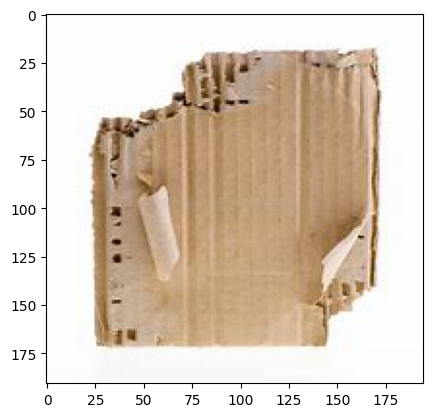

In [ ]:
%matplotlib inline
img = tf.keras.preprocessing.image.load_img('/content/garbage/garbage/Cardboard/OIP (10).jpg')
imgplot = plt.imshow(img)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_dir = os.path.join('/content/garbage/garbage')
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest',
    validation_split=0.2) # set validation split

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=8,
    class_mode='categorical',
    subset='training') # set as training data
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical',
    subset='validation')

Found 400 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


##Modeling

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(strides=2))
model.add(Conv2D(filters=64, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPooling2D(strides=2))
model.add(Conv2D(filters=128, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPooling2D(strides=2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 128)       204928    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 128)      0

In [ ]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=100,
                    verbose=2)

Epoch 1/100
50/50 - 17s - loss: 1.5972 - accuracy: 0.2675 - val_loss: 1.0115 - val_accuracy: 0.5800 - 17s/epoch - 341ms/step
Epoch 2/100
50/50 - 3s - loss: 1.2153 - accuracy: 0.4875 - val_loss: 0.8787 - val_accuracy: 0.7400 - 3s/epoch - 57ms/step
Epoch 3/100
50/50 - 3s - loss: 0.8339 - accuracy: 0.7200 - val_loss: 0.6492 - val_accuracy: 0.7800 - 3s/epoch - 55ms/step
Epoch 4/100
50/50 - 3s - loss: 0.5552 - accuracy: 0.8100 - val_loss: 0.2580 - val_accuracy: 0.9000 - 3s/epoch - 70ms/step
Epoch 5/100
50/50 - 3s - loss: 0.4010 - accuracy: 0.8550 - val_loss: 0.3982 - val_accuracy: 0.8400 - 3s/epoch - 56ms/step
Epoch 6/100
50/50 - 3s - loss: 1.2897 - accuracy: 0.7625 - val_loss: 0.6774 - val_accuracy: 0.8100 - 3s/epoch - 56ms/step
Epoch 7/100
50/50 - 3s - loss: 0.5806 - accuracy: 0.8175 - val_loss: 0.4926 - val_accuracy: 0.8300 - 3s/epoch - 56ms/step
Epoch 8/100
50/50 - 4s - loss: 0.4481 - accuracy: 0.8425 - val_loss: 0.6433 - val_accuracy: 0.8300 - 4s/epoch - 74ms/step
Epoch 9/100
50/50 - 3

In [ ]:
model.evaluate(validation_generator)

7/7 [==============================] - 1s 75ms/step - loss: 0.3492 - accuracy: 0.9200


[0.34918469190597534, 0.9200000166893005]

In [ ]:
validation_generator.class_indices

{'Battery': 0, 'Cardboard': 1, 'Glass': 2, 'Metal': 3, 'Plastik': 4}

##Testing

Saving mieseap.jpeg to mieseap.jpeg
1/1 [==============================] - 0s 27ms/step
1
mieseap.jpeg ini adalah Cardboard


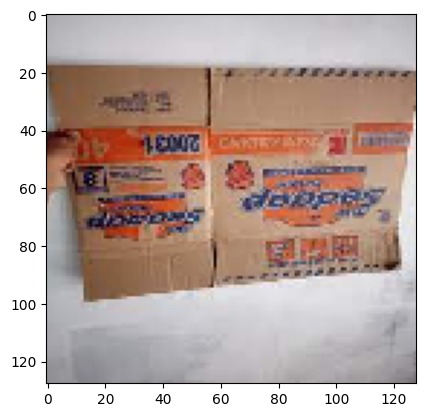

In [ ]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files


uploaded = files.upload()

for fn in uploaded.keys():
  # predicting images
  path = '/content/' + fn
  img = tf.keras.preprocessing.image.load_img(path, target_size=(128, 128))
  x = tf.keras.preprocessing.image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  predict = model.predict(images)
  classes = np.argmax(predict)
  print(classes)
  
 # Print the corresponding label
  if classes == 0:
      print(fn + " ini adalah Baterai")
  elif classes == 1:
      print(fn + " ini adalah Cardboard")
  elif classes == 2:
      print(fn + " ini adalah Glass")
  elif classes == 3:
       print(fn + " ini adalah Metal")
  elif classes == 4:
       print(fn + " ini adalah Plastik")

In [ ]:
model.save('model_92.h5')